In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
def printMetrics(test, pred): 
    cm = confusion_matrix(test,pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    print(f"accuracy: {accuracy_score(test, pred)}")
    print(f"f1_score: {f1_score(test, pred)}")
    print(f"precision_score: {precision_score(test, pred)}")
    print(f"recall: {recall_score(test, pred)}")
    print(f"roc_auc:{roc_auc_score(test,pred)}")

In [21]:
#df = pd.read_csv("datasource/bank_data_after_fe.csv")

In [22]:
df_base = pd.read_csv("datasource/bank_data_after_fe.csv")

In [23]:
df = pd.read_csv("datasource/data_only_cat_mod.csv")

In [24]:
df.describe()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,...,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,41.043971,0.674226,0.590017,0.019082,1403.934458,0.568308,0.154591,263.769358,2.795354,40.218473,...,0.046737,0.040376,0.088772,0.017976,0.175608,0.028208,0.007743,0.646018,0.063606,0.290376
std,10.464800,0.435854,0.293404,0.136832,2811.286428,0.495381,0.361564,260.675975,3.144846,100.170192,...,0.211104,0.196867,0.284454,0.132881,0.380539,0.165589,0.087667,0.478270,0.244084,0.453999
min,19.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,4.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.500000,0.000000,65.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.500000,0.000000,450.500000,1.000000,0.000000,185.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,1.000000,1.000000,0.000000,1477.750000,1.000000,0.000000,330.000000,3.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,42045.000000,1.000000,1.000000,3025.000000,50.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature engeenering v2

In [25]:
df.drop(columns=["job_unknown", "contact_telephone"],  inplace=True)

<Axes: >

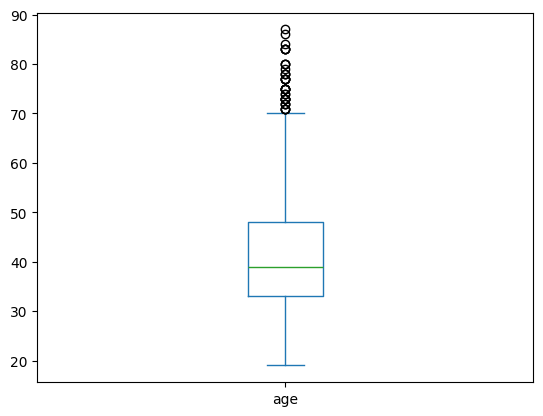

In [26]:
df.age.plot(kind='box')

In [27]:
df["age"] = pd.qcut(df["age"], q = 3, labels=[0,0.5,1])
df["balance"] = pd.qcut(df["balance"], q = 4, labels=[0,0.25,0.5,1])
df["duration"] = pd.qcut(df["duration"], q = 6, labels=[0,0.2,0.4, 0.6,0.8,1])

In [28]:
df['age'] = df['age'].cat.codes.astype('float64')
df['duration'] = df['duration'].cat.codes.astype('float64')
df['balance'] = df['balance'].cat.codes.astype('float64')

for column in ["age", "duration", "balance", "day_of_the_year", "pdays", "campaign"]:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())



In [29]:
df.to_csv("datasource/data_num_to_cat.csv", index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3616 non-null   float64
 1   marital            3616 non-null   float64
 2   education          3616 non-null   float64
 3   default            3616 non-null   int64  
 4   balance            3616 non-null   float64
 5   housing            3616 non-null   int64  
 6   loan               3616 non-null   int64  
 7   duration           3616 non-null   float64
 8   campaign           3616 non-null   float64
 9   pdays              3616 non-null   float64
 10  previous           3616 non-null   int64  
 11  poutcome           3616 non-null   float64
 12  day_of_the_year    3616 non-null   float64
 13  y                  3616 non-null   int64  
 14  job_admin.         3616 non-null   int64  
 15  job_blue-collar    3616 non-null   int64  
 16  job_entrepreneur   3616 

In [31]:
df.describe()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_unknown
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,...,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,0.477461,0.674226,0.590017,0.019082,0.499723,0.568308,0.154591,0.499004,0.036640,0.047269,...,0.023783,0.214049,0.046737,0.040376,0.088772,0.017976,0.175608,0.028208,0.646018,0.290376
std,0.415606,0.435854,0.293404,0.136832,0.372977,0.495381,0.361564,0.341794,0.064181,0.114874,...,0.152394,0.410217,0.211104,0.196867,0.284454,0.132881,0.380539,0.165589,0.478270,0.453999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.500000,0.000000,0.500000,1.000000,0.000000,0.400000,0.020408,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.750000,1.000000,0.000000,0.800000,0.040816,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.age.unique()

array([0. , 0.5, 1. ])

In [33]:
target_value = "y"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=target_value),
    df[target_value],
    test_size=0.2,
    stratify=df[target_value],
    random_state=42,
)

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(
    df_base.drop(columns=target_value),
    df_base[target_value],
    test_size=0.2,
    stratify=df_base[target_value],
    random_state=42,
)

In [34]:
from sklearn.utils import compute_class_weight


weights = compute_class_weight(class_weight="balanced",classes= np.unique(y_train), y = y_train)
weights = {0:weights[0], 1:weights[1]}

# Best trusted

In [64]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight="balanced")),
              ("DecisionTree", DecisionTreeClassifier(max_depth=9, max_features='log2',min_samples_leaf=20)),
              ("Gradient", GradientBoostingClassifier(learning_rate=0.3,n_estimators=1000,init=DummyClassifier(strategy="stratified"),)),
              ("RandomForestClassifier",  RandomForestClassifier(n_estimators=200, max_depth=9, max_features='log2', class_weight="balanced_subsample")),
              ("XGBClassifier", XGBClassifier(n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ("SVC", SVC(class_weight=weights, kernel="linear", decision_function_shape="ovr")),
              ("AdaBoostClassifier", AdaBoostClassifier(algorithm='SAMME', learning_rate=1.6, n_estimators=150))]

Using data from fe v2

accuracy: 0.8867403314917127
f1_score: 0.5858585858585859
precision_score: 0.5043478260869565
recall: 0.6987951807228916
roc_auc:0.8049358118903069


/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


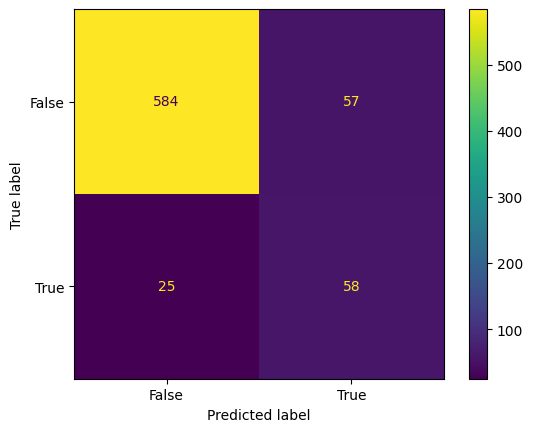

In [65]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}),
                         cv = 10)#1,2
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

### Model presented below is the best one, but there is a room for improvement

Using data from original fe

accuracy: 0.9033149171270718
f1_score: 0.6111111111111112
precision_score: 0.5670103092783505
recall: 0.6626506024096386
roc_auc:0.7985639907524013


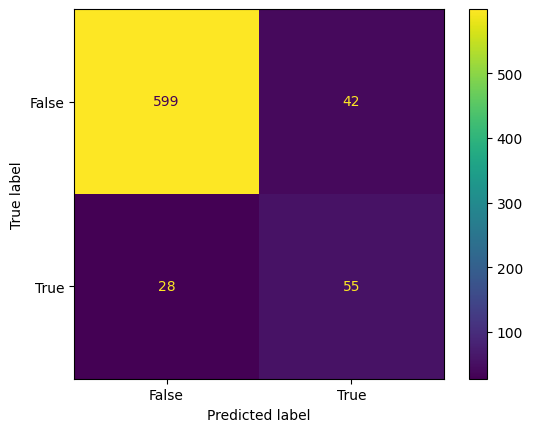

In [66]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}),
                         cv = 10)#1,2
clf.fit(X_train_og, y_train_og)
y_hat = clf.predict(X_test_og)
printMetrics(y_test_og, y_hat)

We are gona use data modifications from original feature engineering

# Tuning

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight=weights)),
              #("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(learning_rate=0.13, min_samples_split=6)),
              ("RandomForestClassifier",  RandomForestClassifier(n_estimators = 1000, n_jobs = -1)),
              ("XGBClassifier", XGBClassifier(n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ("AdaBoostClassifier", AdaBoostClassifier(random_state=42, algorithm="SAMME")),
              ]

accuracy: 0.9033149171270718
f1_score: 0.6111111111111112
precision_score: 0.5670103092783505
recall: 0.6626506024096386
roc_auc:0.7985639907524013


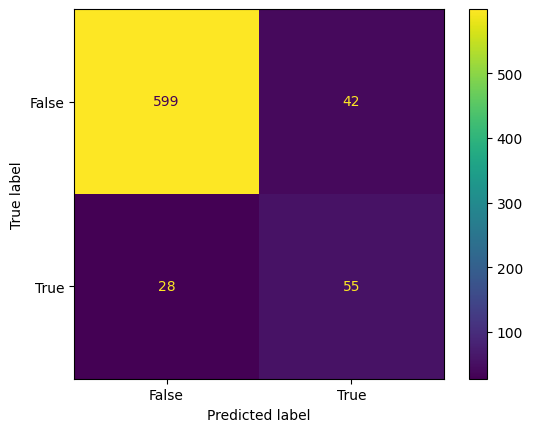

In [57]:
clf = StackingClassifier(estimators=estimators, 
                         final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}),
                         cv = 10)#1,2
clf.fit(X_train_og, y_train_og)
y_hat = clf.predict(X_test_og)
printMetrics(y_test_og, y_hat)

In [28]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    return scores

def evaluate_model_f1(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

    return scores

In [29]:
models = dict()
for e in estimators:
    models[e[0]] = e[1]
models["stacked"] = clf


In [30]:
X = df.drop(columns=target_value)
y = df[target_value]

In [31]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('%8s mean-%.3f std-%.3f' % (name, np.mean(scores), np.std(scores)))

LogisticRegression mean-0.803 std-0.022
Gradient mean-0.898 std-0.011
RandomForestClassifier mean-0.901 std-0.010
XGBClassifier mean-0.898 std-0.010
AdaBoostClassifier mean-0.901 std-0.012
 stacked mean-0.900 std-0.014


In [32]:
res_df = pd.DataFrame(results)
res_df["model"] = names
res_df = res_df.melt(id_vars="model", var_name="cv", value_name="accuracy")
res_df.head()

,model,cv,accuracy
0,LogisticRegression,0,0.839779
1,Gradient,0,0.892265
2,RandomForestClassifier,0,0.897790
3,XGBClassifier,0,0.892265
4,AdaBoostClassifier,0,0.895028


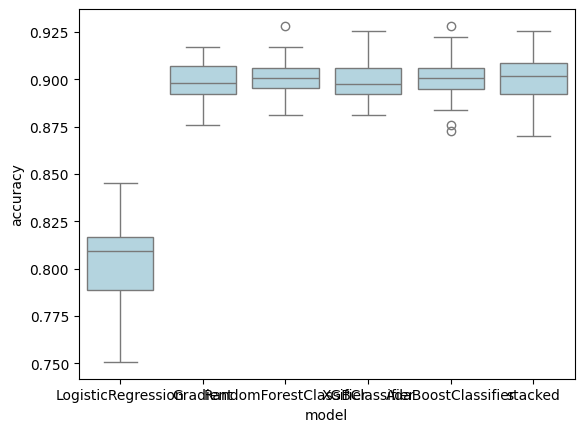

In [33]:
sns.boxplot(res_df, x="model", y="accuracy", color="lightblue")
plt.show()